# 1 Introduction to the Initial Mass Function (IMF)

The Initial Mass Function (IMF) describes the distribution of stellar masses at birth, providing critical insight into star formation, stellar evolution, and galaxy formation. The IMF determines the number of stars at each mass range within a stellar population, influencing the chemical enrichment, mass distribution, and feedback processes in galaxies. Edwin Salpeter first established a foundational model for the IMF in 1955, proposing a power-law distribution that aptly describes the abundance of massive stars in the Milky Way. This "Salpeter slope," which assumes $N(M) \propto M^{-2.35}$, became a standard for understanding stellar populations in star-forming regions [3].

Recent studies have expanded on Salpeter's work, exploring IMF variations in different environments. For instance, massive early-type galaxies (ETGs) exhibit an IMF that deviates from the Milky Way's, often presenting a steeper, "bottom-heavy" IMF that suggests a higher proportion of low-mass stars. This variation is supported by spectroscopic studies and gravitational lensing models, which reveal that the IMF in ETGs might depend on galactic conditions, indicating that it is not universal [2].

Further exploration into the physical origin of the IMF, such as the role of turbulence, gravity, and magnetic fields in star-forming clouds, has provided deeper insights. Recent reviews outline these fundamental processes, suggesting that both high- and low-mass star formation processes are influenced by environmental factors like Mach number and density distribution. These findings help to clarify the conditions under which stars of different masses form and how these conditions shape the IMF over time [1, 4, 6].


# 2 Data Distribution

Loading and Displaying the Table:

In [ ]:
from astropy.io import ascii

table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")
print(table)

Seq   oRA    oDE   AKs(RL) AKs(N) Mi(RL) ...  Jmag   Hmag  Ksmag  A(Ks)  F   Mm
     arcsec arcsec   mag    mag    Msun  ...  mag    mag    mag    mag         
---- ------ ------ ------- ------ ------ ... ------ ------ ------ ----- --- ---
   1   -0.0    0.0   3.472  2.677  67.73 ... 16.794 13.599 11.548 0.007   1   1
   2 10.261 -2.708   3.586  2.768 104.73 ...  -99.0 12.388 10.253 0.005   1   1
   3  6.817  6.062   3.689  2.847 103.73 ... 14.895 12.169 10.256 0.008   1   1
   4  2.071  1.391   3.559  2.745  88.73 ... 15.631 12.376 10.297 0.013   1   1
   5  4.487  2.395   3.348  2.582  79.73 ... 15.399 12.417 10.434 0.007   1   1
   6  4.908  1.357   3.404  2.629 104.73 ... 14.933 12.009  9.998 0.008   1   1
   7  9.374  9.398    -9.0   -9.0 -999.0 ... 16.303 12.416 10.066 0.006   1   0
   8   5.56  4.107   3.461  2.673 104.73 ... 14.893 12.102 10.221 0.007   1   1
   9 -3.406  1.189    -9.0   -9.0 -999.0 ...  -99.0 10.961 10.353 0.005   1   0
 ...    ...    ...     ...    ...    ...

This code visualizes Ks-band brightness as a function of cluster members. We plot Ksmag (brightness) against Mm (cluster member ID). The y-axis is restricted to the range [9, 24] to better show the distribution of brightness values within the cluster:

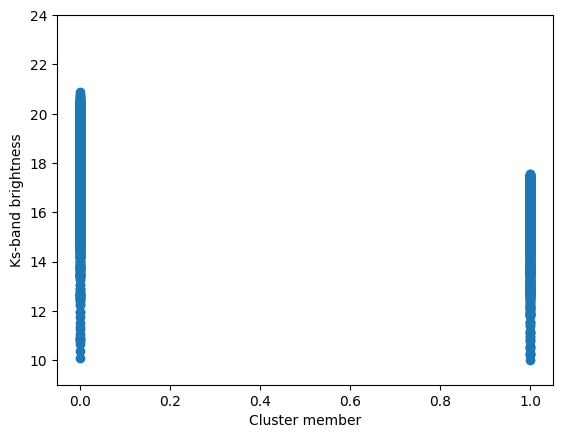

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii
table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")
mag = table["Ksmag"]
clus = table["Mm"]
plt.xlabel("Cluster member")
plt.ylabel("Ks-band brightness")
ax = plt.gca()
ax.set_ylim([9, 24])
plt.plot(clus, mag, "o")

This plots H-band brightness (Hmag) against cluster members. This comparison helps analyze brightness across different spectral bands:

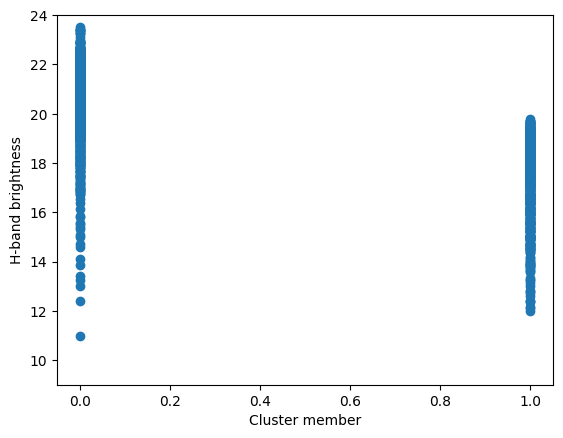

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii
table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")
mag = table["Hmag"]
clus = table["Mm"]
plt.xlabel("Cluster member")
plt.ylabel("H-band brightness")
ax = plt.gca()
ax.set_ylim([9, 24])
plt.plot(clus, mag, "o")

A histogram of Mi(N) (mass) is plotted in logarithmic space to highlight patterns across a wide range of values. This technique is useful for analyzing distributions that span several orders of magnitude.

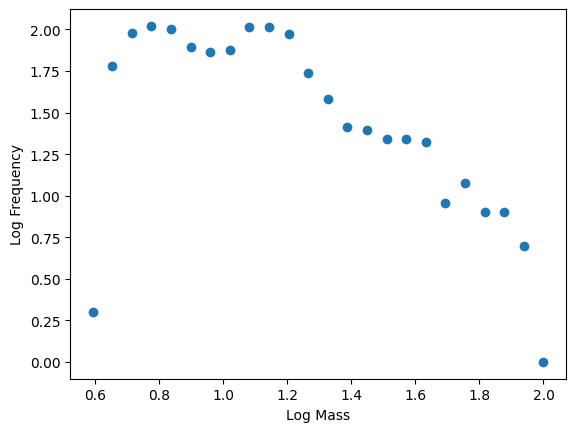

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii
table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")
m = table["Mi(N)"]
m = m[m>0]

x = np.logspace(-1, 2, 50)
y, _ = np.histogram(m, x)

#Fixes RuntimeWarning: divide by zero encountered in log10
y = np.where(y == 0, np.nan, y)

plt.xlabel("Log Mass")
plt.ylabel("Log Frequency")
plt.plot(np.log10(x[1:]), np.log10(y), "o")
plt.show()

Using a log-log plot, we visualize and compare the distributions of different mass measurements (Mi(RL) and Mi(N)). This helps to understand differences in mass distribution types within the same dataset.

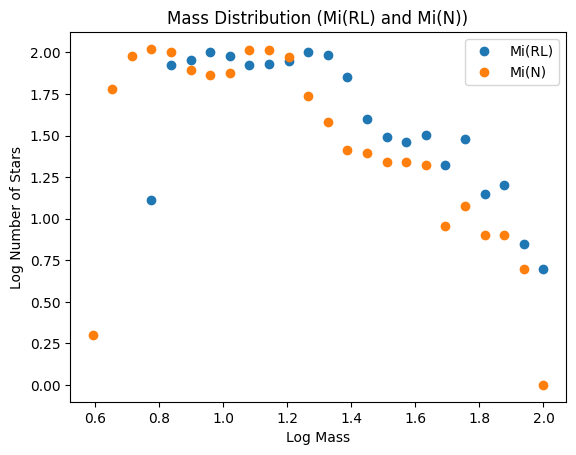

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii

table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")

mi_rl = table['Mi(RL)']
mi_rl = mi_rl[mi_rl > 0]

mi_n = table['Mi(N)']
mi_n = mi_n[mi_n > 0]


x = np.logspace(-1, 2, 50)
y_rl, _ = np.histogram(mi_rl, x)
y_n, _ = np.histogram(mi_n, x)

#Fixes RuntimeWarning: divide by zero encountered in log10
y_rl = np.where(y_rl == 0, np.nan, y_rl)
y_n = np.where(y_n == 0, np.nan, y_n)

plt.plot(np.log10(x[1:]), np.log10(y_rl), 'o', label='Mi(RL)')
plt.plot(np.log10(x[1:]), np.log10(y_n), 'o', label='Mi(N)')
plt.xlabel('Log Mass')
plt.ylabel('Log Number of Stars')
plt.title('Mass Distribution (Mi(RL) and Mi(N))')
plt.legend()
plt.show()

Calculation of basic statistics (mean, median, variance, standard deviation) for M(N) and Gaussian function:

In [16]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")

m_n = table['M(N)']
m_n = m_n[m_n > 0]
mean_m_n = np.mean(m_n)
median_m_n = np.median(m_n)
variance_m_n = np.var(m_n)
std_dev_m_n = np.std(m_n)

print("Mean of M(N):", mean_m_n)
print("Median of M(N):", median_m_n)
print("Variance of M(N):", variance_m_n)
print("Standard Deviation of M(N):", std_dev_m_n)


def f(x):  return (np.exp((-1)*(x-mean_m_n)**2/(2*variance_m_n)))/(np.sqrt(2*np.pi)*std_dev_m_n)

Mean of M(N): 13.385687116564418
Median of M(N): 10.228
Variance of M(N): 127.35579886003559
Standard Deviation of M(N): 11.285202650375206


Probabilty of randomly chosen star in Arches to have a lower mass than the Sun:

![alt text](Arches/Probability.png)

In [9]:
import numpy as np
from astropy.io import ascii

table = ascii.read("./Arches/table5.dat", readme="./Arches/ReadMe.txt")

mi_n = table['Mi(N)']
mi_n = mi_n[mi_n > 0]

mean_mi_n = np.mean(mi_n)
median_mi_n = np.median(mi_n)
variance_mi_n = np.var(mi_n)
std_dev_mi_n = np.std(mi_n)

print("Mean of Mi(N):", mean_mi_n)
print("Median of Mi(N):", median_mi_n)
print("Variance of Mi(N):", variance_mi_n)
print("Standard Deviation of Mi(N):", std_dev_mi_n)

Mean of Mi(N): 13.650245398773006
Median of Mi(N): 10.23
Variance of Mi(N): 151.0246120344333
Standard Deviation of Mi(N): 12.289207136118803


Preasepe cluster proper motion

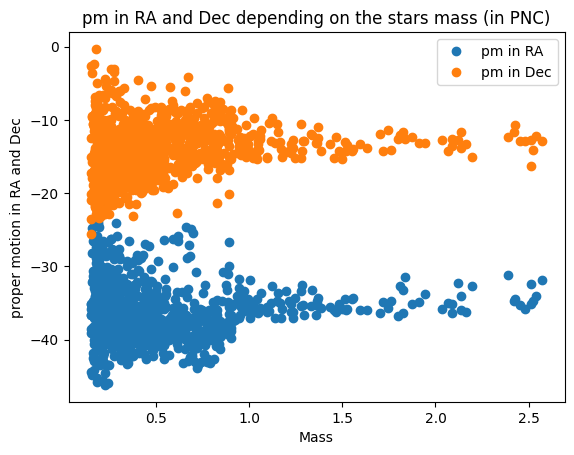

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii, fits

table = fits.getdata("./Praesepe/table2.dat.fits", readme="./Praesepe/ReadMe.txt")
pm = table["pmRA"]
pmd = table["pmDE"]
mass = table["Mass"]
plt.xlabel("Mass")
plt.ylabel("proper motion in RA and Dec")
plt.title('pm in RA and Dec depending on the stars mass (in PNC)')
plt.plot(mass, pm, "o", label='pm in RA')
plt.plot(mass, pmd, "o", label='pm in Dec')
plt.legend()


This code calculates statistics for the mass in the Praesepe cluster and uses a Gaussian function to plot a normal distribution curve. The plot helps us understand the mass spread of stars in this cluster:

Mean of Mass: 0.541248600223964
Median of Mass: 0.417
Variance of Mass: 0.17754560449132173
Standard Deviation of Mass: 0.4213616077567126


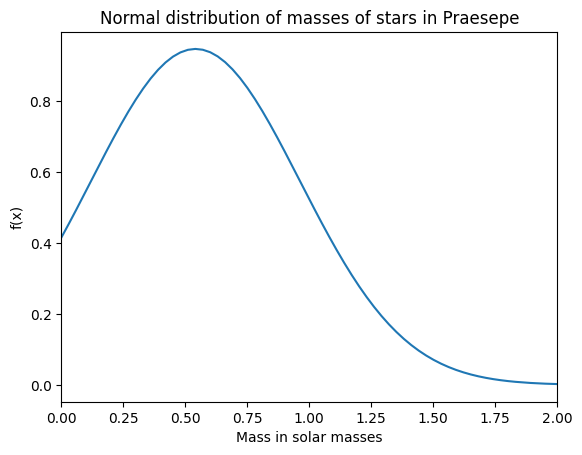

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii, fits

table = fits.getdata("./Praesepe/table2.dat.fits", readme="./Praesepe/ReadMe.txt")
m = table['Mass']

mean_m = np.mean(m)
median_m = np.median(m)
variance_m = np.var(m)
std_dev_m = np.std(m)

print("Mean of Mass:", mean_m)
print("Median of Mass:", median_m)
print("Variance of Mass:", variance_m)
print("Standard Deviation of Mass:", std_dev_m)

def f(x):  return (np.exp((-1)*(x-mean_m)**2/(2*variance_m)))/(np.sqrt(2*np.pi)*std_dev_m)
x_axis = np.linspace(0,30,1000)
y1 = f(x_axis)
plt.plot(x_axis, y1)
plt.xlabel('Mass in solar masses')
plt.ylabel('f(x)')
plt.title('Normal distribution of masses of stars in Praesepe')
ax = plt.gca()
ax.set_xlim([0, 2])
#plt.legend()
plt.show()

Probabilty of randomly chosen star in Praesepe to have a lower mass than the Sun:

![alt text](<Praesepe/Probs in PNC.png>)

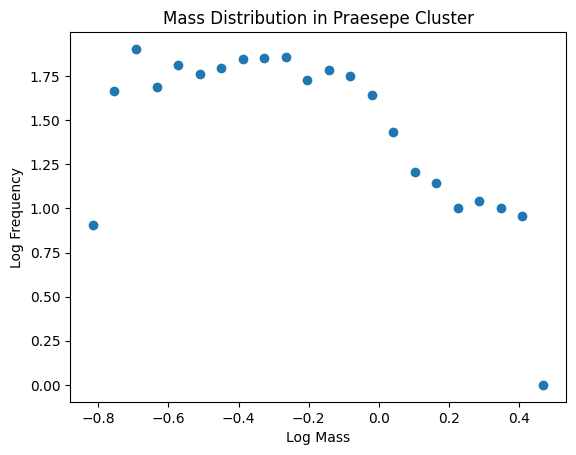

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii, fits

table = fits.getdata("./Praesepe/table2.dat.fits", readme="./Praesepe/ReadMe.txt")
#print(table)
m = table["Mass"]
m = m[m>0]

x = np.logspace(-1, 2, 50)
y, _ = np.histogram(m, x)

#Fixes RuntimeWarning: divide by zero encountered in log10
y = np.where(y == 0, np.nan, y)

plt.plot(np.log10(x[1:]), np.log10(y), "o")
plt.xlabel("Log Mass")
plt.ylabel("Log Frequency")
plt.title("Mass Distribution in Praesepe Cluster")
plt.show()

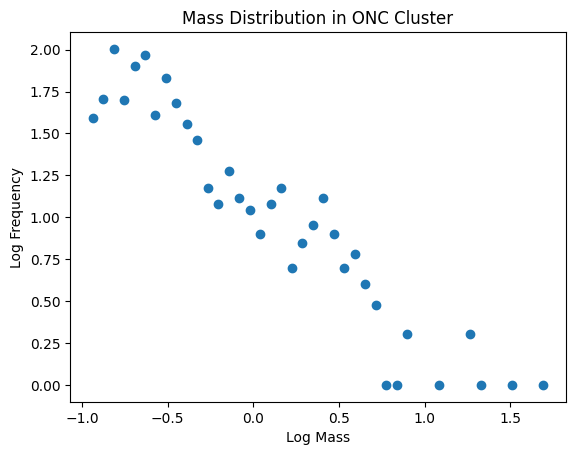

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii, fits

table = fits.getdata("./ONC/table3.dat.fits", readme="./ONC/ReadMe.txt")
#print(table)
m = table["MH97b"]
m = m[m>0]

x = np.logspace(-1, 2, 50)
y, _ = np.histogram(m, x)

#Fixes RuntimeWarning: divide by zero encountered in log10
y = np.where(y == 0, np.nan, y)

plt.plot(np.log10(x[1:]), np.log10(y), "o")
plt.xlabel("Log Mass")
plt.ylabel("Log Frequency")
plt.title("Mass Distribution in ONC Cluster")
plt.show()

# References

[1] Review paper 2024 (Hennebelle et al.): <br>
The Physical Origin of the Stellar Initial Mass Function <br>
https://www.annualreviews.org/content/journals/10.1146/annurev-astro-052622-031748 

[2] Review paper 2020 (Russell J. Smith): <br>
Evidence for Initial Mass Function Variation in Massive Early-Type Galaxies <br>
https://www.annualreviews.org/content/journals/10.1146/annurev-astro-032620-020217

[3] Original paper 1955 (Salpeter): <br>
The Luminosity Function and Stellar Evolution <br>
https://ui.adsabs.harvard.edu/abs/1955ApJ...121..161S/abstract

[4] Recent Study 2020 (Leschinski et al.): <br>
The future of IMF studies with the ELT and MICADO. I. The local Universe as a resolved IMF laboratory <br>
https://ui.adsabs.harvard.edu/abs/2020A%26A...639A.120L/abstract

[5] Recent Study 2019 (Pavlik et al.): <br>
Do star clusters form in a completely mass-segregated way? <br>
https://www.aanda.org/articles/aa/full_html/2019/06/aa34265-18/aa34265-18.html

[6] Recent Study 2024 (Kroupa et al.): <br>
The initial mass function of stars <br>
https://ui.adsabs.harvard.edu/abs/2024arXiv241007311K/abstract

[7]Review Paper 2010 (Bastian et al.):<br>
A Universal Stellar Initial Mass Function? A Critical Look at Variations<br>
https://ui.adsabs.harvard.edu/abs/2010ARA%26A..48..339B/abstract

[8]Paper 2013 (Habibi et al.):<br>
The Arches cluster out to its tidal radius: dynamical mass segregation and the effect of the extinction law on the stellar mass function<br>
https://www.aanda.org/articles/aa/full_html/2013/08/aa20556-12/aa20556-12.html

[9]Paper 2001 (Kroupa):<br>
On the variation of the initial mass function<br>
https://ui.adsabs.harvard.edu/abs/2001MNRAS.322..231K/abstract

[10]Paper 2013 (Khalaj, Baumgardt):<br>
The stellar mass function, binary content and radial structure of the open cluster Praesepe derived from PPMXL and SDSS data<br>
https://ui.adsabs.harvard.edu/abs/2013MNRAS.434.3236K/abstract